# Determining Shoppers Online Purchasing Intent

<img align="center" width="600" height="500" src="https://nmgprod.s3.amazonaws.com/media/files/7c/58/7c58ed58f9ed85184957c34b7124e0b0/cover_image.jpg.640x360_q85_crop.jpg">

## Table of Contents <a name="t"></a>
1. [EDA](#eda)
    - [Finding Errors](#errors)
    - [Data Assumptions](#assump)
    - [Interesting Relationships](#relat)
    - [Outlier Significance](#out)
    - [Interesting Facts](#facts)
    - [Correlation Analysis](#corr)
    - [Chi-Square Test](#chi)
2. [Benchmark Models](#bench)
3. [Data Pre-processing](#proc)
4. [Feature Selection](#feat)
5. [Modeling with Pre-processed Data](#aftpip)
6. [Hyperparameter Optimization](#hyopt)
7. [Modeling with Optimized Hyperparameters](#modhypopt)
8. [Ensamble Modeling](#ensamble)
9. [Exploring Feature Importance with Our Best Model](#featimp)
10. [Results & Reccomendations](#resrec)
11. [How about if we exclude page values?](#nopageval)
12. [What you can get better results](#futurework)

Online e-commerce applications are becoming a primary vehicle for people to find, compare, and ultimately purchase products. One of the fundamental questions that arises in e-commerce is to characterize, understand, and model user long-term purchasing intent, which is important as it allows for personalized and context relevant e-commerce services.

Understanding online purchase intent and its buildup over time is important because individuals spend large amounts of time and resources on online shopping—in the U.S. alone, e-commerce sales have reached over 350 billion USD per year and are expected to grow at around 15% annually.

Visit [Business Understanding Notebook](https://github.com/fairfield-university-ba545/project2-mem/blob/master/1_Business_Understanding/business_understanding.ipynb) for more detail. 

In this project we aim to answer the following analytical questions:
- How accurately are we able to predict that a customer is going to make an online purchase on a website?
- What and what is the range of driving factors that lead to a purchase? 
- Can the probability of online purchase produced through data mining represent the "real" probability of customer online purchase?
- Do those who purchase products tend to be of a certain region? returning or new visitor? buying near a special day, particular month or weekend? or spending more time on a specific page or click-thorugh (bounce) freuqently? What pages do they visit and time spent on them before exit?

## Data Dictionary 
<img align="center" width="600" height="500" src="data_dictionary.jpg">


The origial dataset can be found here: [UCI Data](http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)


## Project Outline
- **Our project is divided into 3 main parts**
- **Steps and important findings will be shared in this report. If you want to see how the code was executed links to full Notebooks are provided at each step.**

<img align="left" width="500" height="500" src="Data_Process_Diagram.jpeg">

<span style="font-family:Papyrus; font-size:2em;">Now that we got the formalities out of the way, let's begin!</span>
- if you're wondering how I changed the font size and type: https://support.squarespace.com/hc/en-us/articles/206543587-Markdown-cheat-sheet

In [25]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# setting to display max columns
pd.set_option('display.max_columns', 500)

In [26]:
# read in data 
data = pd.read_csv('online_shoppers_intention.csv')
print('Number of rows, columns: ', data.shape)

Number of rows, columns:  (12330, 18)


## STEP 1: Exploratory Data Analysis (EDA) <a name="eda"></a>
The link to whole EDA notebook can be found here: **[Data Understanding](https://github.com/fairfield-university-ba545/project2-mem/blob/master/Project2FinalReport/EDA/EDA_data_understanding.ipynb)**

<font size="3">- Explore the dataset</font><br>
<font size="3">- Find errors to clean </font><br>
<font size="3">- Find interesting relationships that could answer/half-answer our analytical questions </font><br>
<font size="3">- Create new features out of those relationships </font><br>

Back to [Table of Contents](#t)

Month and VisitorType needs to be encoded

In [5]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

- we have no missing values BUT that does not mean we do not have any logical errors

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- There are many positive (4th quantile) outliers in our data **BUT** that is not neccessarally a bad thing
    - Page durations have most evident outliers in their 4th quantile 
- The following values occur the **most frequently**: Month of May, returning visitor, not the weekend, and revenue false 
- **Missing 2 months** (only 10)
- **Target Feature (Revenue) Imbalanced** (10,422 False, 1908 True)

In [17]:
# Looking at the descriptive statisticss for each column
# verifies no missing values with count 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330,NaN,NaN,NaN,2.31517,3.32178,0,0,1,4,27
Administrative_Duration,12330,NaN,NaN,NaN,80.8186,176.779,0,0,7.5,93.2562,3398.75
Informational,12330,NaN,NaN,NaN,0.503569,1.27016,0,0,0,0,24
Informational_Duration,12330,NaN,NaN,NaN,34.4724,140.749,0,0,0,0,2549.38
ProductRelated,12330,NaN,NaN,NaN,31.7315,44.4755,0,7,18,38,705
ProductRelated_Duration,12330,NaN,NaN,NaN,1194.75,1913.67,0,184.137,598.937,1464.16,63973.5
BounceRates,12330,NaN,NaN,NaN,0.0221914,0.0484883,0,0,0.00311247,0.0168126,0.2
ExitRates,12330,NaN,NaN,NaN,0.0430728,0.0485965,0,0.0142857,0.0251564,0.05,0.2
PageValues,12330,NaN,NaN,NaN,5.88926,18.5684,0,0,0,0,361.764
SpecialDay,12330,NaN,NaN,NaN,0.0614274,0.198917,0,0,0,0,1


Let's look more closely.

## Finding Errors <a name="errors"></a>
- We will bin and encode Month, SpecialDay, and VisitorType

**Months**<br>
- Website had **most traffic** in 2nd and 4th quarter
- January and april are missing
- We decide to **bin it into quarters** and then use **One-Hot encoding** becasue we think we can capture more seasonality/trend which would be more meaningfull to the business /

In [9]:
print('Nbr of months: ',len(data.Month.value_counts()))
data.Month.value_counts()

Nbr of months:  10


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

- bin and one hot encode visitor type (i.e. Returning_Visitor = 1, New_Visitor = 2, Other = 3, then One-Hot)

In [12]:
data.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

### Encoding 

In [44]:
# we have 10 months, missing Jan, Apr 
# encode into quarters 
def division_func_month(div) :
    if div == 'Feb':
        return 1
    elif div == 'Mar':
        return 1
    elif div == 'May':
        return 2
    elif div == 'June':
        return 2
    elif div == 'Jul':
        return 3
    elif div == 'Aug':
        return 3
    elif div == 'Sep':
        return 3
    elif div == 'Oct':
        return 4
    elif div == 'Nov':
        return 4
    elif div == 'Dec':
        return 4
    else:
        return 0
    
# from object to integers
data['quarter'] = data['Month']
# apply function
data['quarter'] = data['quarter'].apply(division_func_month)

# encoding for revenue and weekend
def div_fun_visType(div) :
    if div == 'Returning_Visitor':
        return 1
    if div == 'New_Visitor':
        return 2
    else:
        return 0
    
# from boolean to integers
data['VisitorType_encode'] = data['VisitorType']
# apply function
data['VisitorType_encode'] = data['VisitorType_encode'].apply(div_fun_visType)

data1=data.copy()

# One-hot encode
data1 = pd.get_dummies(data1, columns=['VisitorType_encode','quarter','SpecialDay'])

## Data Assumptions <a name="assump"></a>

**We assume the following to be the logical data values**

- No NA values allowed
- Administrative, Informational, Product related page and their corresponding duration can be zero (e.g. don't visit and spend time on that page) but cannot be a negative value visit
- Similarly you cannot have negative values for Bounce Rates, Exit rates, Page values, Operating system, Browser, Region
- You cannot have zero values for Exit rates as at some point user will exit
- Browser, region, traffic type and operating system represent segment a user based on their usage and zero category was not mentioned in data description
- Special Day similarly only contains certain values from 0 to 1 in increments of 0.2 (cannot have other values)

**We assume the following to be the correct data types**

- Count: Administrative, Informational, ProductRelated, Browser, OperatingSystem
- Binary: Revenue (Y), Weekend
- Categorical: TrafficType, Region, VisitorType, SpecialDay
- Continous: Administrative_Duration,Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates, PageValues
- Date/time: Month

**NOTE:** Need to convert counts into ratios (Administrative, Informational, and Product Related)

**We only found one logical error**
- Where exit rates == 0 impute with median (becasue there is only 76 values we believe imputing with median is sufficient)
    - We assume that exit rate cannot be zero for a user who logs into a website session

In [19]:
# we have 76 values to impute 
data[(data['ExitRates'] == 0) & (data['BounceRates'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorTypeBin_1,VisitorTypeBin_2,VisitorTypeBin_3,quarter_1,quarter_2,quarter_3,quarter_4
5457,1,63.4,0,0.0,3,120.400000,0.0,0.0,42.293068,0.0,Oct,1,1,3,3,New_Visitor,False,True,0,1,0,0,0,0,1
5494,0,0.0,0,0.0,24,968.692424,0.0,0.0,106.252517,0.0,Nov,1,1,9,2,Returning_Visitor,False,True,1,0,0,0,0,0,1
5505,0,0.0,0,0.0,16,519.866667,0.0,0.0,0.000000,0.0,Jul,1,1,1,4,Returning_Visitor,False,False,1,0,0,0,0,1,0
5533,6,85.2,0,0.0,11,203.000000,0.0,0.0,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,False,1,0,0,0,0,0,1
5636,0,0.0,0,0.0,13,187.000000,0.0,0.0,0.000000,0.0,Sep,2,5,4,1,Returning_Visitor,False,False,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,3,94.6,0,0.0,17,265.500000,0.0,0.0,0.000000,0.0,Oct,2,2,1,2,New_Visitor,False,False,0,1,0,0,0,0,1
7848,1,53.4,0,0.0,3,292.000000,0.0,0.0,0.000000,0.0,Nov,2,2,1,4,Returning_Visitor,False,False,1,0,0,0,0,0,1
7853,1,51.4,0,0.0,7,562.300000,0.0,0.0,36.657350,0.0,Jul,1,1,6,2,New_Visitor,True,True,0,1,0,0,0,1,0
7923,0,0.0,0,0.0,47,636.700000,0.0,0.0,0.000000,0.0,Aug,2,4,1,2,New_Visitor,False,False,0,1,0,0,0,1,0


### Dealing with imbalanced dataset
You need to deal with **imbalanced data set** when the value of finding the minority class is much higher than that of finding the majority.

Let say that 1% of the population have that rare disease. Suppose that you assign the same cost to saying that a healthy man is sick or saying that a sick man is healthy. Provide a model that say that everybody are healthy, get 99% accuracy and go home early. The problem with such a model is that though it has high accuracy, it will probably not what you are looking for. Most of the time you want to find the people with the disease (giving high weigh to false negatives) much more than you are afraid to send an healthy person to unneeded test (low weight to false positives). In a real world health problem the ratio between the weight can easily be 1 to 1,000.

The imbalance in the distribution fails most algorithms from finding a proper solution.

We used **SMOTE over-sampling technique** to handle this<br>
    - Visit our **[Baseline Modeling Notebook]()** to see the implementation.<br>

Text(0.5, 1.0, 'Target Variable (Revenue) Imbalance')

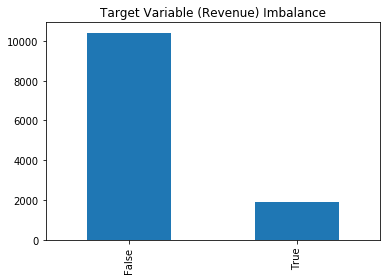

In [11]:
data.Revenue.value_counts().plot(kind='bar')
plt.title('Target Variable (Revenue) Imbalance')

## Interesting relationships - Outlier Significance <a name="relat"></a>

Through our EDA below we confirm our suspicion that outliers are important and decide to **skip the outlier treatment step** in our pipeline. More importantly it gives us insight in what **new features we can engineer**. 

### Linear Relationship 

- Bounce and Exit Rates have a good linear relationship
- Outliers could indicate Revenue false
- Revenue True seems more concentrated between 0 - 0.1
- Revenue false has much more observations
- Higher exit and bounce rates might mean a higher probability that the revenue will be false
- **Combining the following 2 features might give us better modeling results**
    - we will use weighted average 

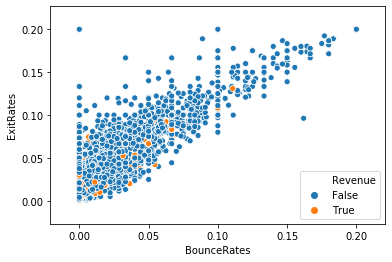

In [20]:
ax = sns.scatterplot(x="BounceRates", y="ExitRates",hue = 'Revenue', data=data1)

### Negative Relationship
- We found significant negative relationships in many features and decide to create new ones with **ratios** 
- We discover **3 interesting patterns**:
    - Higher page values and lower duration is more likely to lead to a user purchase
    - The higher the bounce rate the more likely revenue will be False

#### High Page Value and Lower Page Duration 
- Higher page values and lower duration is more likely to lead to a user purchase 
- Or in general higher page calue can lead to higher revenue

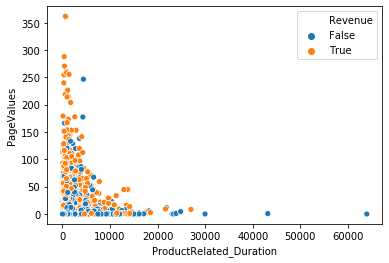

In [21]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="PageValues",hue = 'Revenue', data=data1)

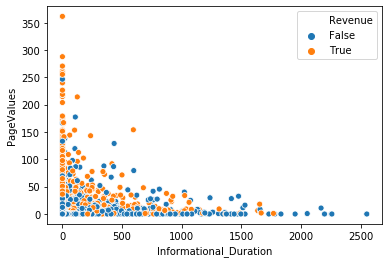

In [25]:
ax = sns.scatterplot(x="Informational_Duration", y="PageValues",hue = 'Revenue', data=data)

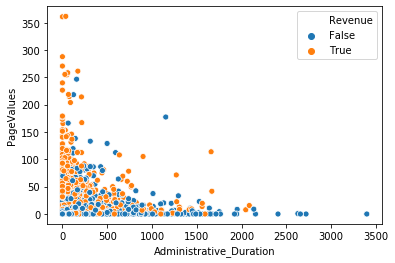

In [26]:
ax = sns.scatterplot(x="Administrative_Duration", y="PageValues",hue = 'Revenue', data=data)

**High Bounce Rate = higher probability of revenue being false (and vice versa)**
- Here we have a flipped relationship 
- The higher the bounce rate the more likely revenue will be False 

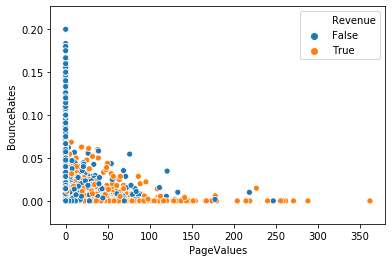

In [22]:
ax = sns.scatterplot(x="PageValues", y="BounceRates",hue = 'Revenue', data=data1)

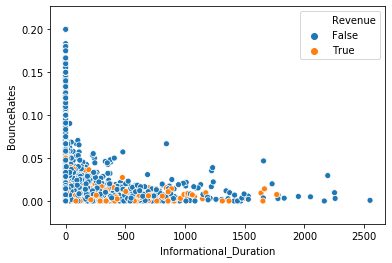

In [27]:
ax = sns.scatterplot(x="Informational_Duration", y="BounceRates",hue = 'Revenue', data=data)

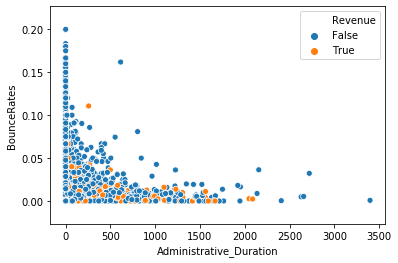

In [28]:
ax = sns.scatterplot(x="Administrative_Duration", y="BounceRates",hue = 'Revenue', data=data)

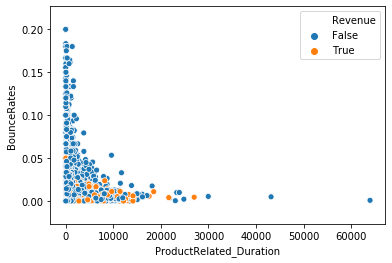

In [29]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="BounceRates",hue = 'Revenue', data=data)

**Higher Exit rate = higher probability of revenue being false (and vice versa)!!**

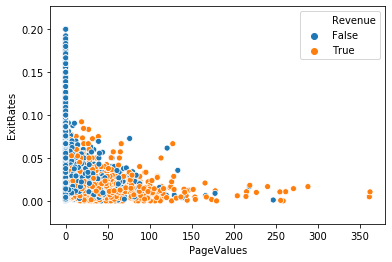

In [24]:
ax = sns.scatterplot(x="PageValues", y="ExitRates",hue = 'Revenue', data=data1)

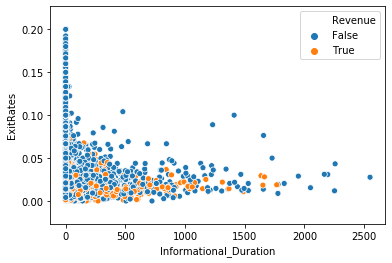

In [30]:
ax = sns.scatterplot(x="Informational_Duration", y="ExitRates",hue = 'Revenue', data=data)

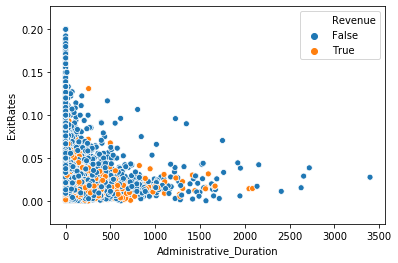

In [31]:
ax = sns.scatterplot(x="Administrative_Duration", y="ExitRates",hue = 'Revenue', data=data)

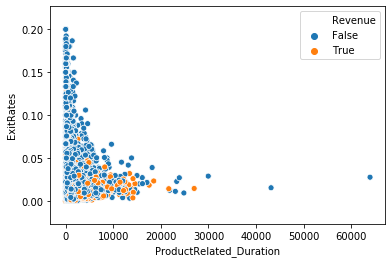

In [32]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="ExitRates",hue = 'Revenue', data=data)

### Confirming Outlier Significance (Box-plots & IQR) <a name="out"></a>

There are many outliers in out dataset and by removing them (as seen above) we could introduce a lot of error into our dataset. More importatnly we can benefit from these relationships to build better models. 

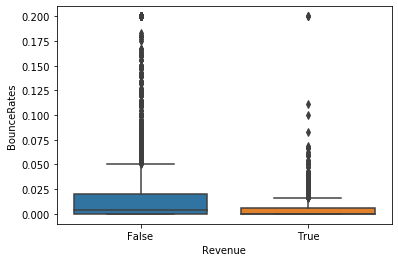

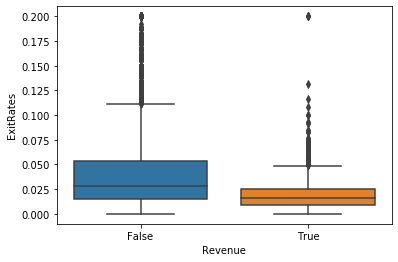

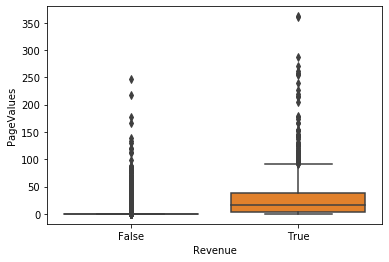

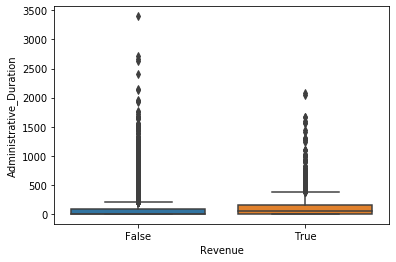

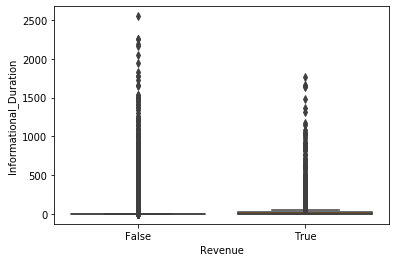

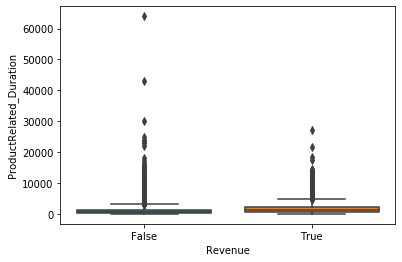

In [36]:
for el in ['BounceRates', 'ExitRates','PageValues', 'Administrative_Duration','Informational_Duration',
              'ProductRelated_Duration']:
    sns.boxplot(x = 'Revenue', y = el,  data = data1)
    plt.show()

In [33]:
# select 
outlier = data1.select_dtypes(include=['float64'])
outlier = outlier.drop('SpecialDay', axis = 1 )

In [34]:
# Calculate IQR range
def iqr_calc(df):
    Q1 = df.quantile(0.25) # Q1 range
    Q3 = df.quantile(0.75) # Q3 range
    IQR = Q3 - Q1 # IQR range
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

- About 10-20% of our data consists of outliers. We assume it would not be reccomended to impute so much in this case.

In [35]:
outlier.apply(iqr_calc)

Administrative_Duration    1172
Informational_Duration     2405
ProductRelated_Duration     961
BounceRates                1551
ExitRates                  1099
PageValues                 2730
dtype: int64

### Interesting Facts <a name="facts"></a>
- most common number for page visits is 0 (could indicate that user does not visit all three pages in a session)
- a day before and after a special day (holiday) has the most volume
- 2 operating systems and browsers are used the most when on website
- most visitors come from region 2 (we do not know what region this actually is)
- traffic type 2 is most common
- 4th and then 2nd quarter have the most volume on the site
- most volume is during the week
- Returning visitors are the most common on the website

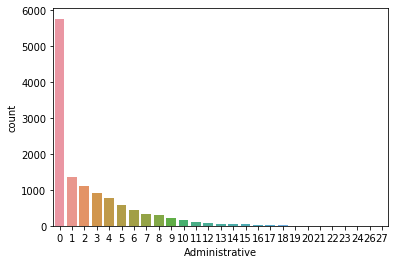

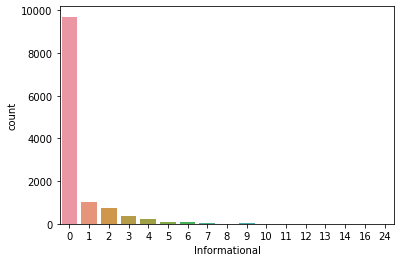

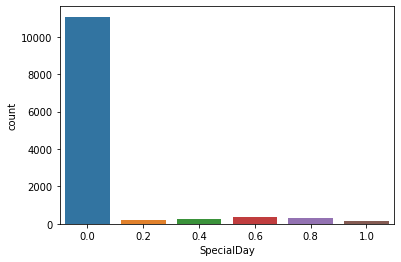

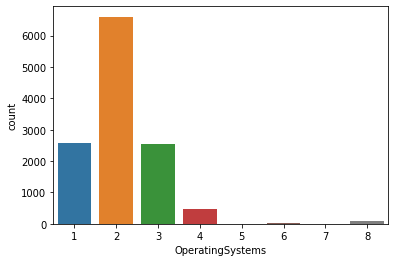

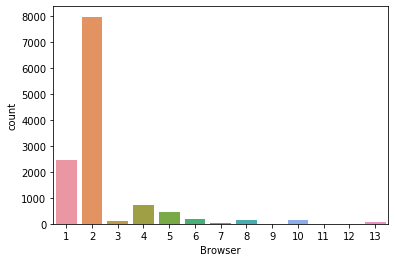

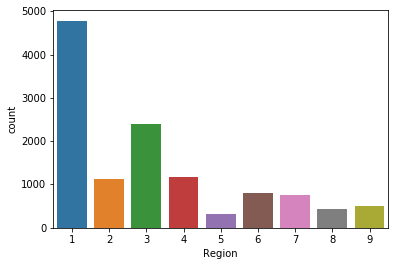

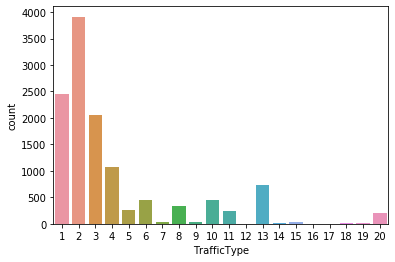

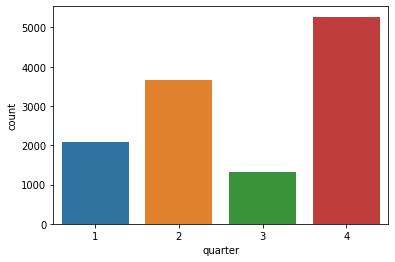

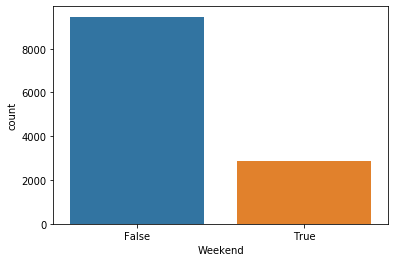

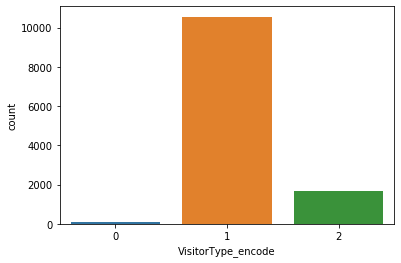

In [47]:
col_names = ['Administrative', 'Informational', 'SpecialDay','OperatingSystems', 'Browser', 'Region',
             'TrafficType','quarter', 'Weekend', 'VisitorType_encode']

df = data[col_names]
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

### Correlation Analysis <a name="corr"></a>
- High negative correlation between Exit Rates, Page durations,and page value makes sense. If the user spends more time on the page it will exit less and vice versa.
- Exit and Bounce rates might have a linear relationship becasue the more the user "bounces" from one page to another, more chances there are he/she will exit. 
    - Now interesting question is whether bounce rates cause more users to exit or is it something else?
- Page values correlation is highest for product related duration 
    - this means product related page makes the most revenue for the website 

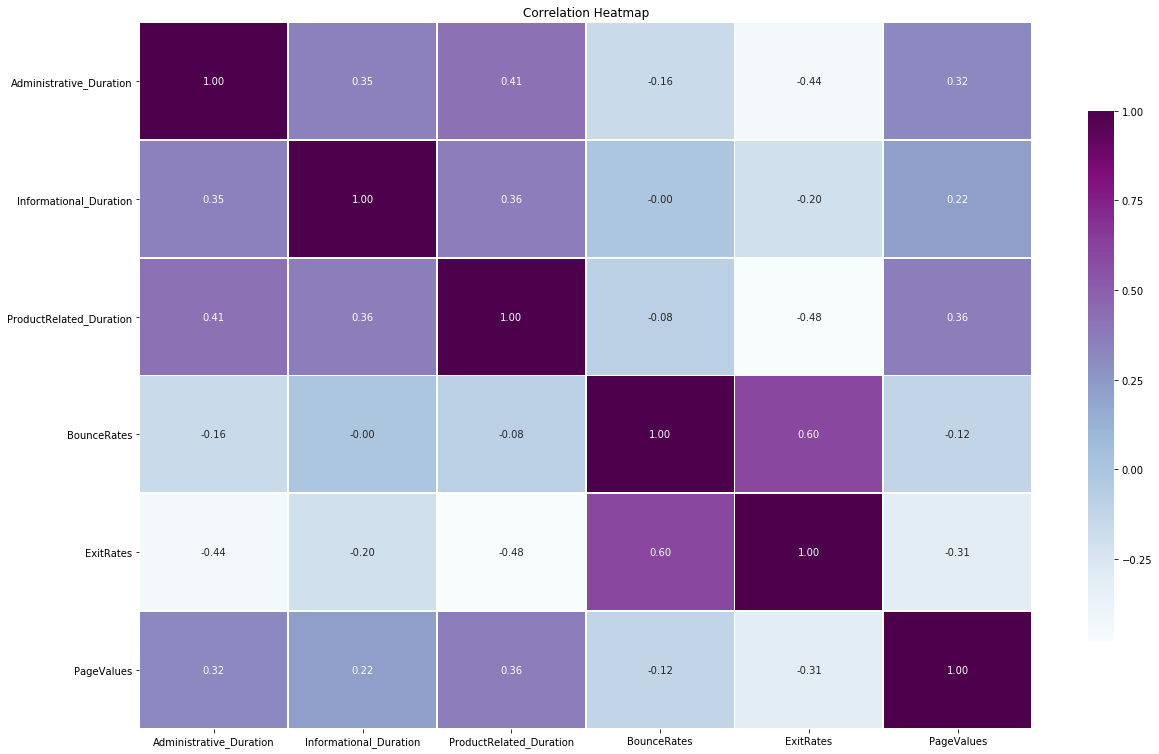

In [38]:
#Created a heatmap to see the correlation between the different variables
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,13))

# select continous feature columns
continous_data = data1.select_dtypes(include=['float64']).drop('SpecialDay', axis = 1)

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(data1[continous_data.columns].corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu',
                      linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')
plt.savefig('corr_raw.png')

## Chi-Square (for categorical) <a name="chi"></a>

In [50]:
from sklearn.feature_selection import chi2

# features
X = data[['Administrative', 'Informational', 'SpecialDay','OperatingSystems', 'Browser', 'Region',
             'TrafficType','quarter', 'Weekend', 'VisitorType_encode']]
# target
y = data['Revenue']

# chi-square test
chi_scores = chi2(X,y)

# here first array represents chi square values and second array represnts p-values
chi_scores

(array([1.13396553e+03, 3.57981605e+02, 5.37970945e+01, 1.03713226e+00,
        8.87329135e+00, 3.03756529e+00, 1.28319432e+00, 1.09786943e+02,
        8.12046425e+00, 1.35223832e+01]),
 array([1.37016070e-248, 7.74616955e-080, 2.22301227e-013, 3.08489372e-001,
        2.89372951e-003, 8.13578563e-002, 2.57305949e-001, 1.09109691e-025,
        4.37683493e-003, 2.35734868e-004]))

Since Operating system, traffic type, and region has higher the p-value, it says that this variables is independent of the responce and it **may not be viable for model training** (or have poorer performance). This was actually accurate as we will find out in our feature selection. 

Text(0.5, 1.0, 'Significance (p-value) of Categorical Features')

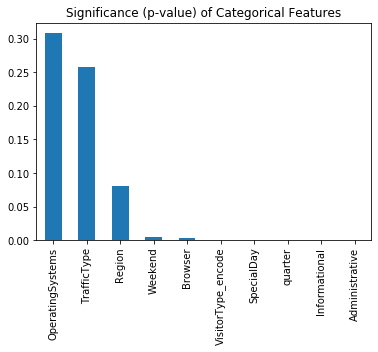

In [52]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
plt.title('Significance (p-value) of Categorical Features')

### Benchmark Modeling Results <a name="bench"></a>
Before we began our pipelines we wanted to know what would be our baseline results. For this step we encoded our data (as above) and performed min-max standardization as it does not assume normality. Here are our results:

Code for the following results can be found here: **[Baseline Modeling Notebook](https://github.com/fairfield-university-ba545/project2-mem/blob/master/5_Modeling/Baseline_Modeling.ipynb)**

<img align="center" width="500" height="500" src="Baseline_models_results.jpeg">

We also ran **TPOT** (Genetic Algorithm). The result gave us the hint that **random forest might be the best model** and its parameters. **The best AUC score was 93.06%.** As this was not our best result we will only link the **[full notebook HERE](https://github.com/fairfield-university-ba545/project2-mem/blob/master/5_Modeling/tpot.ipynb).**

Back to [Table of Contents.](#t)

### Step 2: Data Pre-processing <a name="proc"></a>
We will not spend to much time here as these steps are quite standard. Visit the notebooks if you want to see how each step in the pipeline was implemented.

<img align="center" width="500" height="500" src="data_preprocessing_pic.jpeg">

**Pipeline A**
- [Feature Engineering](https://github.com/fairfield-university-ba545/project2-mem/blob/master/3_Data_Preprocessing/pipelineA/PipelineA_full.ipynb)
- [MinMax](https://github.com/fairfield-university-ba545/project2-mem/blob/master/3_Data_Preprocessing/pipelineA/PipelineA-MinMax.ipynb)
- [Normlize](https://github.com/fairfield-university-ba545/project2-mem/blob/master/3_Data_Preprocessing/pipelineA/PipelineA-Normalize_Skew.ipynb)

**Pipeline B**
- [Feature Engineering](https://github.com/fairfield-university-ba545/project2-mem/blob/master/3_Data_Preprocessing/PipelineB/PipelineB_full.ipynb)
- [Zscore](https://github.com/fairfield-university-ba545/project2-mem/blob/master/3_Data_Preprocessing/PipelineB/PipelineB-Zscore.ipynb)
- [Normalize](https://github.com/fairfield-university-ba545/project2-mem/blob/master/Project2FinalReport/Pipelines/PipelineB-Normalize_Skew.ipynb)

Back to [Table of Contents.](#t)

### Data Shape after data merge
- after our 2 pipelines we have 108 features that can be used for training
- our advice is to drop original features for those you engineered new ones becasue it can become tricky as you have to manually select features for modeling. **Only one mix of feature can be in a model** (i.e. PageValues_scales and PageValuesExitRate cannot be in the same model). 

In [56]:
data_merge = pd.read_csv('all_model_data.csv', index_col=0)
print('New dataframe shape: ', data_merge.shape)

New dataframe shape:  (12330, 109)


## 10-way Voting Feature Selection <a name="feat"></a>
All features were used in the model selection becasue we wanted to see whether our new engineered features beat our standard pipeline features. The most votes the feature receives the higher it ranks or more important it could be. 

**Full notebook code implementation can be found [HERE](https://github.com/fairfield-university-ba545/project2-mem/blob/master/4_Feature_Selection/feature_selection_code.ipynb).**

### Methods: 
- **Filter:** Pearson, f_classif (Anova F value)
- **Wrapper:** RFE with Logistic regression and XGBoost
- **Embeded:** Logistic Regression, Random Forest, XGBoost, LassoCV, RidgeClassifierCV

**Findings:**
We do not get the definitive answer whether our engineered features are better than "standard" ones. However, a wide range of choice can be good depending on the model. The most important features and variations are the relationships we highlighted above: 
- Page durations, page values, bounce rates, and exit rates 
- 4th quarter ends up in 20th place as it has the most website volume 

Back to [Table of Contents.](#t)

In [57]:
feature_selection = pd.read_csv('feature_selection.csv', index_col=0)
feature_selection.head(20)

,Feature,Pearson,f_classif,RFE-Log,RFE-XGBoost,Logistics,LassoCV,RidgeClassifierCV,Random Forest,XGBoost,LinearSVC,Total
1,ProductRelated_Duration_Scaled,True,True,True,True,True,False,True,True,True,True,9
2,PageValues_Norm_Scaled,True,True,True,True,True,True,True,True,False,True,9
3,ExitPageRatio_Norm_Scaled,True,True,True,True,True,True,True,True,False,True,9
4,BounceRates_Scaled,True,True,True,True,True,True,True,True,True,False,9
5,BouncePageRatio_Norm_Scaled,True,True,True,True,True,True,True,True,False,True,9
6,BounceExitW4_Norm_Scaled,True,True,True,True,True,True,True,True,False,True,9
7,ProductRelated_Duration_Norm_Scaled,True,True,True,False,True,True,True,True,False,True,8
8,ProdRelPageRatio_Scaled_Bin,True,True,True,False,True,True,True,True,False,True,8
9,ProdRelExitRatio_Norm_Scaled,True,True,True,False,True,True,True,True,False,True,8
10,PageValues_Scaled_Bin,True,True,True,False,True,True,True,True,False,True,8


## Modeling After Pipelines and Feature Selection <a name="aftpip"></a>

- After our data was preprocessed from our 2 pipelines we ran many models to get the best features
- Models we ran were still mainly on defualt settings
- We ommited decision tree model as results did not improve significantly
- There were 10 iterations for each model (average or standard deviation was taken of all results)

Our model is indeed Random Forest with Average AUC CV 97%. We also see that standard pipeline features worked best for this model.

Full modeling code can be found here **[preprocessed_data_modeling-Copy1.ipynb](https://github.com/fairfield-university-ba545/project2-mem/blob/master/5_Modeling/preprocessed_data_modeling.ipynb)**

<img align="center" width="600" height="500" src="modeling_preprocessed_results.jpeg">

Back to [Table of Contents.](#t)

## Hyperparameter Optimization (GridSearchCV & RandomSearchCV) <a name="hypopt"></a>
- We ran gridsearchCV and randomsearchCV to get the best parameters possible. We still ran the models on the same features we got after our first modeling results. We received better results for almost all models however, it is important to note that these 2 methods are not always too reliable. A better yet more complicated method to use would be Bayesian Optimization. 

**Full code notebook can be found [HERE](https://github.com/fairfield-university-ba545/project2-mem/blob/master/6_Model_Optimization/hyperparameter_tuning.ipynb)**

Back to [Table of Contents.](#t)

### Modeling After Hyperparameter Optimization <a name="modhypopt"></a>
Full notebook code can be found **[HERE](https://github.com/fairfield-university-ba545/project2-mem/blob/master/6_Model_Optimization/hypermerameter_optimized_modeling.ipynb)**

- After hyperperameter optimization we ran models again (10-iterations) with the same features and best parameters we got from gridsearchCV and randomsearchCV. 
- We found out that for many models we got poorer results. However, it improved AUC result from XGBoost considerably by more than 3% (and KNN by 1%)
- We assume we could've gotten better results if we included more parameters in the grid search 

<img align="center" width="600" height="500" src="modeling_hyp_optimization.jpeg">

Back to [Table of Contents.](#t)

## Ensamble modeling <a name="ensamble"></a>
As an exercise we tried ensamble modeling for which you can view the code **[HERE](https://github.com/fairfield-university-ba545/project2-mem/blob/master/7_Ensamble_Modeling/Ensamble_Modeling.ipynb).**

Back to [Table of Contents.](#t)

## EXPLORING FEATURE IMPORTANCE OF RANDOM FOREST (BEST MODEL) <a name="featimp"></a>

- We will outline the best feature below, however, you can find the **[code for top 3 features here](https://github.com/fairfield-university-ba545/project2-mem/blob/master/5_Modeling/best_model_feature_importance.ipynb)**. The findings will of course be covered in the results.

Back to [Table of Contents.](#t)

In [2]:
# read in data 
import pandas as pd
data = pd.read_csv('all_model_data.csv', index_col = 0)
# split data into labels and target
X = data.drop('Revenue', axis = 1)
y = data.Revenue

In [3]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [4]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 

feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

Here for instance we see that a lot of page value variations are at the top. We need to choose only one variation of the feature.

In [5]:
feature_importances.head() # select one from each variation 

,importance
PageValues_Scaled,0.063268
PageValues_Scaled_Norm,0.051634
ProdRelPageRatio_Scaled_Norm,0.048676
PageValues_Norm_Scaled,0.044294
ProdRelPageRatio_Scaled,0.040843


## Top 5 Features Based on Importance
- it is worth mentioning exit rates that are quite to the top but are a mix feature with page values (PageValues_Scaled more important)

In [22]:
feature_importances.iloc[[0,13,18,21,29],:]

,importance
PageValues_Scaled,0.063268
ProductRelated_Duration_Norm_Scaled,0.014747
Administrative_Duration_Scaled_Norm,0.011373
totalFracProd_Scaled_Norm,0.010639
ExitRatesImpute_Scaled,0.009697


In [64]:
import matplotlib.pyplot as plt 
import seaborn as sns

# subsetting dataframe
rev_true = data[data['Revenue']==True]
rev_false = data[data['Revenue']==False]

print(rev_true.shape)
print(rev_false.shape)

(1908, 109)
(10422, 109)


## Top Feature - PageValues_Scaled

Text(0, 0.5, 'Density')

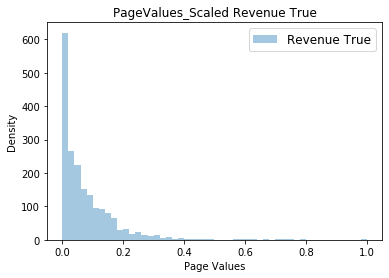

In [65]:
feat1_1 = rev_true.PageValues_Scaled
sns.distplot(feat1_1,  kde=False, label='Revenue True')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('PageValues_Scaled Revenue True')
plt.xlabel('Page Values')
plt.ylabel('Density')

- Higher page value (outliers) lead to revenue
- Page value gives an idea of which page in your site contributed more to your site's revenue
- To increase revenue attention must be given to quality of the webpage

Text(0, 0.5, 'Density')

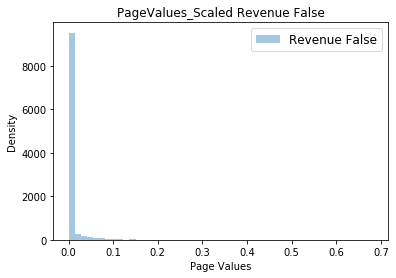

In [66]:
feat1_0 = rev_false.PageValues_Scaled
sns.distplot(feat1_0,  kde=False, label='Revenue False')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('PageValues_Scaled Revenue False')
plt.xlabel('Page Values')
plt.ylabel('Density')

- Lover the page value, less likely the purchase will occur
- Less outliers (values concentrated around 0)

Text(0.5, 1.0, 'Boxplot Page Values Revenue True')

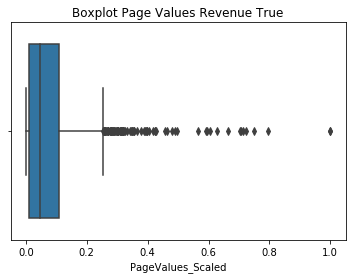

In [68]:
sns.boxplot(x=feat1_1)
plt.title('Boxplot Page Values Revenue True')

- we see better here that page values is bigger and outliers are more to the right when revenue is true

Text(0.5, 1.0, 'Boxplot Page Values Revenue False')

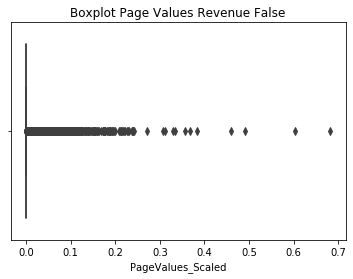

In [69]:
sns.boxplot(x=feat1_0)
plt.title('Boxplot Page Values Revenue False')

- mostly 0 values with majority of outliers around 0-0.3 for revenue false

# RESULTS & RECCOMENDATIONS <a name="resrec"></a>

Back to [Table of Contents.](#t)

### Answering our analytical questions

Our best model was Random Forest (not optimized):

<img align="center" width="600" height="500" src="random_forest_pic.jpeg">

We can say with 97% certainty whether the user will make a online purchase or not. Moreover, the model correctly classified revenue false with 96% precision, and instances of Revenue true with 56% precision. Meainng we a have rather low false positive rate for Revenue false class and rather high false positive rate for revenue true class. Our recal is 0.88 and 0.76 which means the algorythm returned most of the relavent results and the model is good with identifyin false negatives. 

We reccomend using our **KNN** model (with no parameter tuning) if your goal is classifying positive classes of revenue true, as it has highest precision - 79%. 

<img align="center" width="600" height="500" src="knn_best_precision.jpeg">

## Here are our reccomendations:

1. Make the website as easy to use a possible 
    - the more time the user spends on product related page the more likely it will make a purchase 
2. Product related page and duration is the most important as it has the highest positive correlation with page value 
    - page value tells us from which page we get the most revenue
3. If you keep the user on the product related page for 0.08 or more there is a higher chance he will make a purchase 
    - Attention needs to be grabbed here (i.e. promotions, variaty of choice, specific call to action, discounts etc.)
4. The more pages the user visits less likely he will make a purchase 
    - one explanation for these extremes could be developers websrapping the website, however, we do not believe that is the case 
    - we think if the user has to go to different websites the information and features are not well organized which in turn leads for users not purchasing and exiting
    - the more quality information the user can get without leaving a page the better (mazon 1-click order is a good example)
5. The majority of users do not make a purchase 
    - we reccomend focusing on a great call to action that would lead users to make a purchase 
6. the website has the most returning users which means **good retention rate** 
    - we reccomend reaching out to new customer segments to reach new users (e.g. promotions, engagement, surveys to learn what to improve...)
    - User with traffic type 2 and from region 1 account for the majority of traffic (we do not know from data documentation what these numbers represent). We reccomend expanding to other channels while still taking care of this segment which you clearly know how to attract. A different strategy might need to be used when expanding in the new segment or region. Our reccomendation is reaching out to a segment that has market revevance (likes to buy) and is identified with what you are selling. 
7. Focus marketing efforts for when the most website traffic happens
    - before and after a special day (holiday)
    - 4th and 2nd quarter 
    - during the week 
8. Users generally use 2 operating systems and 2 browsers. We would reccomend improve responsiveness to these 2 most popular types. When expanding these 2 factors will need to be researched if they need to be expanded. 

## How about if we exclude page values? <a name="nopageval"></a>
We conducted this analysis as we thought would be interesting to see how the model behaves and what features it considers the most important. Below are a few highlights but if you want to see the whole analysis just click **[HERE](https://github.com/fairfield-university-ba545/project2-mem/blob/master/5_Modeling/modeling_without_pagevalues.ipynb).**

Back to [Table of Contents.](#t)

#### Few take-aways
- For revenue true we see low distribution when duration is lower (0-0.06). Makes sense if they spend less time on the page less likely users will purchase. However, those who do must be familar with the website and know what they want. The distribution then increases exponentially until 0.10 - 0.14 and then spikes again for 0.15. 0.10 - 0.15 duration could be considered the hisghes chance the user will purchase comparing to revenue false. So it would be wise to devise the website in such a way users will spend that amount of time on the page (specific call to action, discounts etc.)
- For revenue false there are many 0 values which signify the user did not make it to the page = no revenue. It would be wise to get some answers as to why that happened. 
- The closer the the exit rate is to zero and less outliers it has to the right, the more likely user will make a purchase. 
- It would be interesting see what are the factors on the website that customers do not like that prompts them to exit

<img align="center" width="400" height="500" src="no_pagevalues_feat_importance.jpeg">

#### Modeling results
As wee see our modeling results are far worse comparing to precision. However, recall does not seem that bad meaning we received we got revavent results (lower number of false negatives). 

<img align="center" width="400" height="500" src="no_pagevalues_modeling_results.jpeg">

### Here are our reccomendations of what could lead to better results <a name="futurework"></a>

Back to [Table of Contents.](#t)

There are limitations with this dataset as it is focused on short-term user activity on whether a given user session will result in a purchase. But its important to note that the purchase intent of a consumer may slowly build up over time, and may not instantaneously lead to a purchase. Furthermore, traditional studies often examine user behavior on a single e-commerce platform, while users may use several different services and move across e-commerce platforms when deciding which product to purchase and where. Thus, what is missing from the picture is a **cross-platform analysis of how user purchase intent varies over time.** To this end, it is important to contrast the population of purchasing users with the population of non- purchasing users, and then also identify how purchasers’ online behavior changes over time from the norm as a result of impending purchases.

- make use of ensambles models especially the voting ensamble